In [328]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [329]:
btc_path = 'data\BTCUSDT.csv'

df = pd.read_csv(btc_path, index_col=0)



<>:1: SyntaxWarning:

invalid escape sequence '\B'

<>:1: SyntaxWarning:

invalid escape sequence '\B'

C:\Users\ferre\AppData\Local\Temp\ipykernel_30348\3407920867.py:1: SyntaxWarning:

invalid escape sequence '\B'



In [330]:
lag = 1
df['target'] = (df['Close'].shift(-lag - 1) / df['Close'].shift(-1)) - 1

In [331]:
df['max'] = df['Close'].rolling(10).max()
df['signal'] = (df['Close'] == df['max']).astype(int)

In [332]:
df = df.dropna()

In [333]:
df['target'] = df['target'] - (0.1 / 100)

In [334]:
df['sums'] = (df['signal'] * (df['target'])).cumsum()




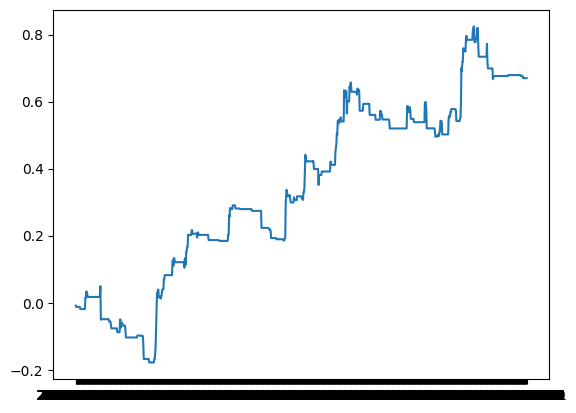

In [335]:
plt.plot(df['sums'])

plt.savefig('fig1.png')

In [336]:


fig = go.Figure()

# Loop through window sizes
for win in range(5, 31, 1):
    df['max'] = df['Close'].rolling(win).max()
    df['signal'] = (df['Close'] == df['max']).astype(int)
    df['sums'] = (df['signal'] * df['target']).cumsum()
    
    # Add trace for each window size
    fig.add_trace(go.Scatter(y=df['sums'], mode='lines', name=f'Window {win}', x=df.index))

# Update layout
fig.update_layout(
    title='Cumulative Sum of Signals',
    xaxis_title='Index',
    yaxis_title='Cumulative Sum',
    legend_title='Rolling Window',
    height=800,
    width=800

)

# Show the figure
fig.show()
